<a href="https://colab.research.google.com/github/zakia16/Machine-Learning-Projects/blob/main/Clustering_IRIS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the Iris dataset
data = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=np.c_[data['data'], data['target']],
                  columns=data['feature_names'] + ['target'])

data=df
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#Exploratory Data Analysis

In [ ]:
data.shape

(150, 5)

In [ ]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='viridis')

In [ ]:
data['target'].unique()

array([0., 1., 2.])

*There* are 3 unique species in the dataset.  
But their are some cases where we don't know the unique target. Inertia will help us to find n_clusters in such cases

In [ ]:
#lets seperate the species column from rest of the columns
target = data.iloc[:,4]
features = data.iloc[:,0:4]

target.head()
#features.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

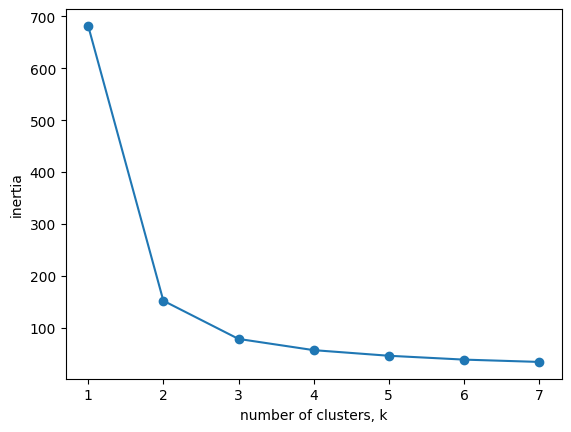

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks = range(1, 8)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)

# Fit model to features
    model.fit(features)
# Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#Apply KMeans clustering model:

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
model.fit(features)

labels = model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Model Evaluation

1. Inertia

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 78.851441426146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. Silhouette Score:
The coefficient ranges from -1 to 1, where a value close to 1 indicates a well-clustered data point, a value close to 0 suggests overlapping clusters, and a value close to -1 indicates a misclassified data point.

In [7]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
labels = kmeans.labels_
silhouette_avg = silhouette_score(features, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5528190123564095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3. Visual

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


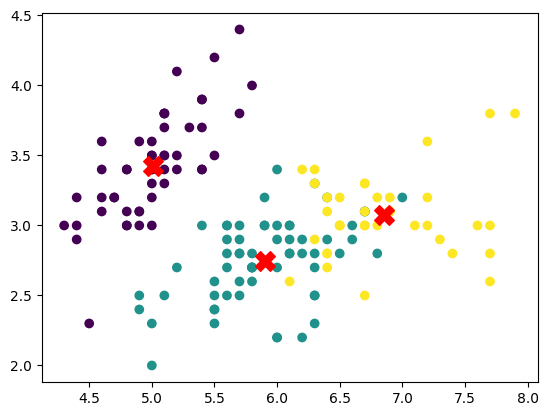

In [8]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
labels = kmeans.labels_
print(labels)

# Assuming data is 2D
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.show()

In [ ]:
labels.size

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0
 2 0]


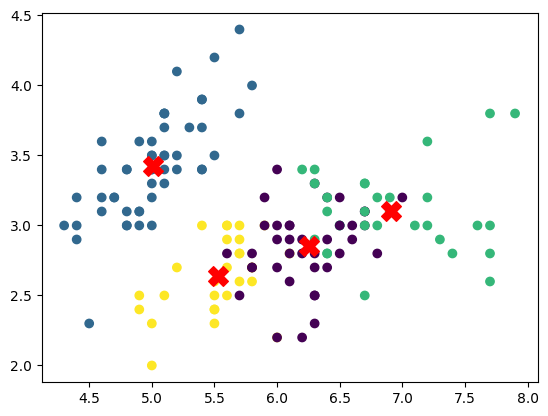

In [ ]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
labels = kmeans.labels_
print(labels)

# Assuming data is 2D
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.show()

#**Problem** : I am not able to plot all four features in one graph, so will use PCA

#Feature Scaling & Applying PCA

At 0.95 confidence Interval got pca.n_components_= 2

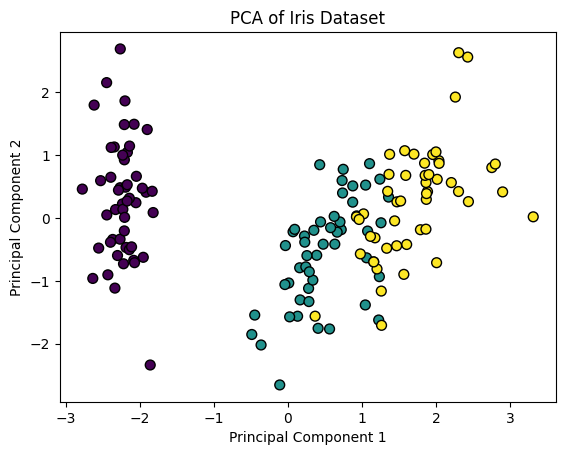

In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_std)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

In [ ]:
X_pca.shape

(150, 2)

In [10]:
# Get the weight values for each feature in the first two principal components
weights = pca.components_

# Print the weight values
print("Weight values for each feature in PC1:")
print(weights[0])

print("\nWeight values for each feature in PC2:")
print(weights[1])

Weight values for each feature in PC1:
[ 0.52106591 -0.26934744  0.5804131   0.56485654]

Weight values for each feature in PC2:
[0.37741762 0.92329566 0.02449161 0.06694199]


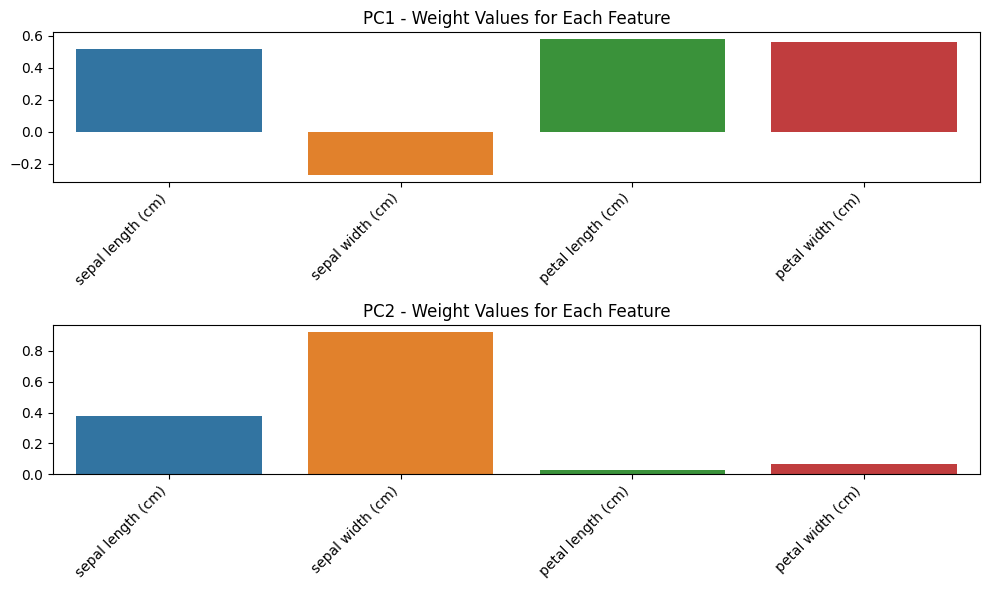

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names from the original dataset
feature_names = iris.feature_names

# Plot the weight values for each feature in PC1 and PC2 vertically
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
sns.barplot(x=feature_names, y=weights[0])
plt.title('PC1 - Weight Values for Each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.subplot(2, 1, 2)
sns.barplot(x=feature_names, y=weights[1])
plt.title('PC2 - Weight Values for Each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [12]:
variance= pca.explained_variance_

pca1= variance[0]
print(pca1)

pca2= variance[1]
print(pca2)

2.938085050199996
0.9201649041624882


In [ ]:
# More on PCA : https://www.youtube.com/watch?v=8klqIM9UvAc

Here, we used 0.95 as Confidence Interval and got 2 component, but how about we visualize the variance to make the decision??????

Variance of the PCA features:   
The iris is 4-dimensional. But what is its intrinsic dimension? lets Make a plot of the variances of the PCA features to find out.

In [13]:
# We took PCA without specifying .95
model = PCA()
model.fit(data.iloc[:,0:4])

#Got 4 component as expected:
model.n_components_

4

In [14]:
model.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [16]:
features = range(model.n_components_)
features

range(0, 4)

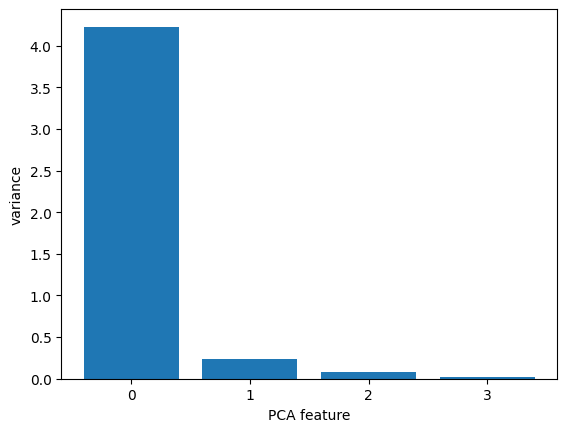

In [17]:
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

As we can see in the graph only the first two features has the significant variance that can be considered.    
This is another way for dimensionality reduction of the iris dataset, retaining only the 2 most important components.

After that we do transformation and do PCA(n_components=2) as we did before

#Now apply **K-means ** to see Centroids and visualize how perfect our model is:


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
models= kmeans.fit(X_pca)
labels = kmeans.labels_
print(labels)

Visualize:

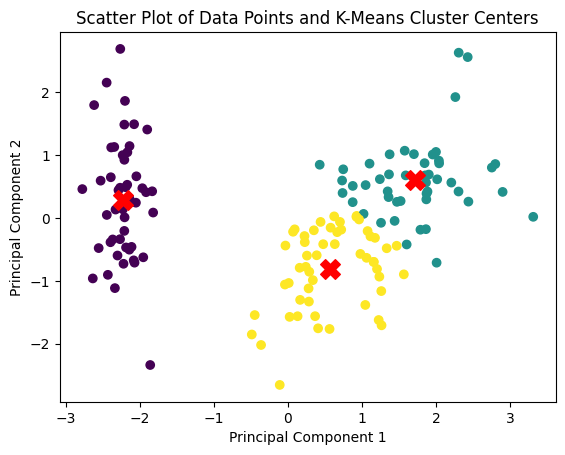

In [19]:
import matplotlib.pyplot as plt

# Assuming X_pca is a NumPy array
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('Scatter Plot of Data Points and K-Means Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Silhouette Score:

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5091683341503112


Dunn Index:The Dunn Index is an external cluster validation metric that measures the compactness of clusters and the separation between clusters. It's calculated as the ratio of the minimum inter-cluster distance to the maximum intra-cluster distance. A higher Dunn Index indicates better clustering.

In [22]:
from sklearn.metrics import pairwise_distances
import numpy as np

def dunn_index(X, cluster_assignments):
    # Calculate pairwise distances between points
    distances = pairwise_distances(X)

    # Calculate minimum inter-cluster distance
    min_inter_cluster_distance = np.inf
    for i in range(max(cluster_assignments) + 1):
        for j in range(i + 1, max(cluster_assignments) + 1):
            inter_cluster_distance = np.min(distances[cluster_assignments == i][:, cluster_assignments == j])
            min_inter_cluster_distance = min(min_inter_cluster_distance, inter_cluster_distance)

    # Calculate maximum intra-cluster distance
    max_intra_cluster_distance = max([np.max(distances[cluster_assignments == i][:, cluster_assignments == i]) for i in range(max(cluster_assignments) + 1)])

    # Calculate Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance

    return dunn_index_value

# Assuming X is your feature matrix and cluster_assignments is the result of k-means clustering
dunn_index_value = dunn_index(X_pca, kmeans.labels_)
print(f"Dunn Index: {dunn_index_value}")


Dunn Index: 0.019531387699526434


A Dunn Index value of 0.0195 is quite low, and in general, higher values are preferred as they indicate better-defined clusters and greater separation between them. However, the interpretation of the Dunn Index can be somewhat context-dependent and may vary based on the characteristics of data.